# Análise exploratoria de textos

Para gerar nosso extrator de hashtags, vamos primeiro entender qual o melhor método para estrair tais dados, teremos trés aproximações distintas. Existem api's e bibliotecas que sImplificam muito nosso trabalho mas, neste caso realizaremos todo o processo de forma a entender da base matemática até a implementação do método. Acredite, este conhecimento será muito importante no nosso artigo de organizações orientadas a dados. E acredite, vai me dar razão rsrsrs

#### Imports

In [1]:
import re 
import nltk
import numpy as np
import gensim
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from gensim.models import translation_matrix
from nltk.cluster import KMeansClusterer
from nltk import tokenize  
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from gensim.models import Word2Vec
from sklearn import cluster
from sklearn import metrics
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D 
warnings.filterwarnings('ignore')

#### Data Source Test

Inicialmente vamos utilizar um texto fixo que depois será substituido por um texto aleatorio e, finalmente por uma entrada de texto a criterio do usuario.

In [3]:
corpus = 'Nosso sistema precisa escalar! Nossa organização trabalha apenas com microsserviços! Monólitos devem sempre ser migrados para' \
        'microsserviços… o modelo de micro-funções da Netflix é fantástico, por que não podemos adotá-lo em nossa organização? Ah, mas' \
        'a Amazon faz assim… a Uber assado. Quantas vezes você leu ou ouviu isso nos últimos meses? Sinceramente, não consigo contar' \
        'quantas vezes li ou ouvi frases assim nas últimas duas semanas. Quantas vezes disseram estas frases, a colegas de trabalho,' \
        'gerentes e subordinados? Várias! Não é mesmo? E tudo bem, não é errado pensar em querer o melhor da tecnologia em nossas' \
        'organizações. Meu intuito até aqui, é apresentar alguns questionamentos bem tímidos e, que se diga de passagem, são bem comuns' \
        'em nosso dia a dia. Como disse no artigo anterior (e que você pode acessar clicando neste link), muitas vezes escolhemos adotar' \
        'metodologias de outras organizações, não respeitando a cultura das nossas próprias organizações, porém será mesmo que esta é a' \
        'melhor forma? Será que quando tomamos a decisão de migrar nosso monólito (de estimação) que funciona super bem, entrega valor' \
        'para o cliente final, pode ser facilmente monitorado (guarde o termo monitoramento, vamos usar bastante), e possui um custo' \
        'operacional baixo? Será que nossas organizações estão preparadas, técnica e culturalmente para trabalhar com um emaranhado de' \
        'processos e metodologias que regem o domínio dos microsserviços e micro-funções? Será que realmente precisamos mudar? Quando' \
        'comecei a escrever este artigo, a versão original acabou tendo mais de oitenta paginas e ficaríamos meses falando somente sobre' \
        'este tema. Acabei reduzindo bastante, removendo as páginas de cálculos e equações (que serão abordadas em artigos futuros) e,' \
        'mesmo assim, foi necessário dividir este artigo em três partes. Nesta primeira parte abordaremos o Hello World!! Onde vamos' \
        'apresentar e analisar muito superficialmente, cada uma dessas perguntas ao longo desse artigo!'

In [4]:
#wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(corpus)
#plt.figure(figsize=(10,8))
#plt.imshow(wordcloud, interpolation='bilinear')
#plt.axis("off")
#plt.show()

In [5]:
phrases = corpus.lower().split(',')

In [6]:
stopwords = nltk.corpus.stopwords.words('portuguese')
def CleanText(text):
    token = tokenizer.tokenize(phrase)
    return [word for word in token if word not in stopwords]
    

In [7]:
tokenizer = nltk.RegexpTokenizer(r"\w+")
tokenized_corups = []
for phrase in phrases:
    tokenized_corups.append(CleanText(phrase))

In [8]:
sentences = tokenized_corups

In [9]:
#?Word2Vec

In [10]:
model = Word2Vec(sentences, cbow_mean=1, window=2,min_count=1)

In [11]:
vocab = list(model.wv.vocab)
X = model[vocab]

In [12]:
tsne = TSNE(n_components=3)
X_tsne = tsne.fit_transform(X)

In [13]:
df = pd.DataFrame(X_tsne, index=vocab, columns=['x', 'y','z'])

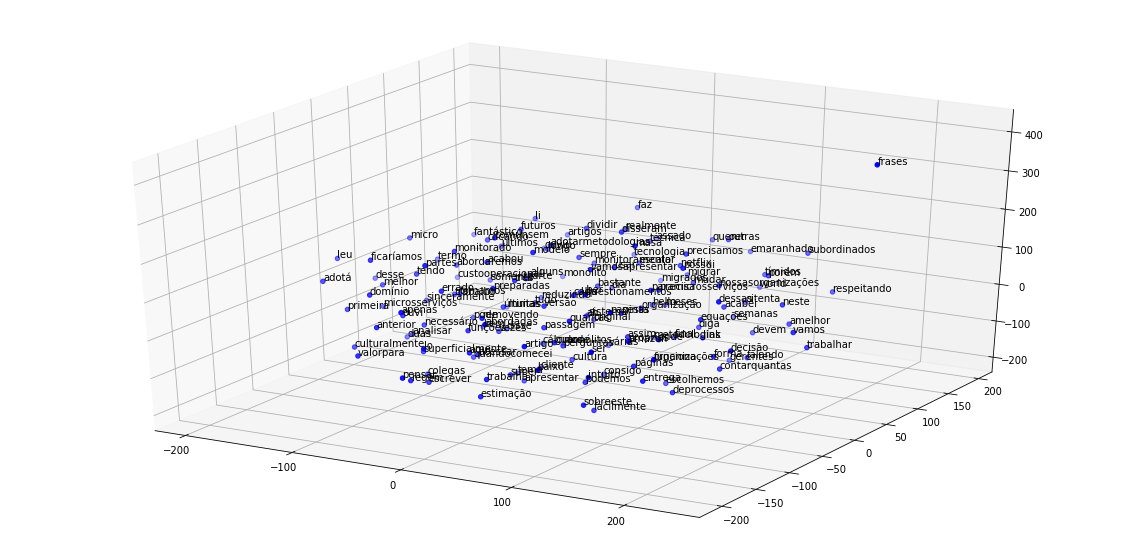

In [14]:
fig = plt.figure(figsize=(20,10))
ax = plt.axes(projection = '3d')
ax.scatter(df['x'], df['y'], df['z'],c='b')

for word, pos in df.iterrows():
    ax.text(pos['x'], pos['y'], pos['z'], word)

In [15]:
#print (model.wv.most_similar(positive=['monólitos'], negative=[], topn=10))

In [16]:
index = gensim.similarities.MatrixSimilarity(gensim.matutils.Dense2Corpus(model.wv.syn0.T))

In [17]:
similarity_matrix = []
for sims in index:
    similarity_matrix.append(sims)
similarity_array = np.array(similarity_matrix)

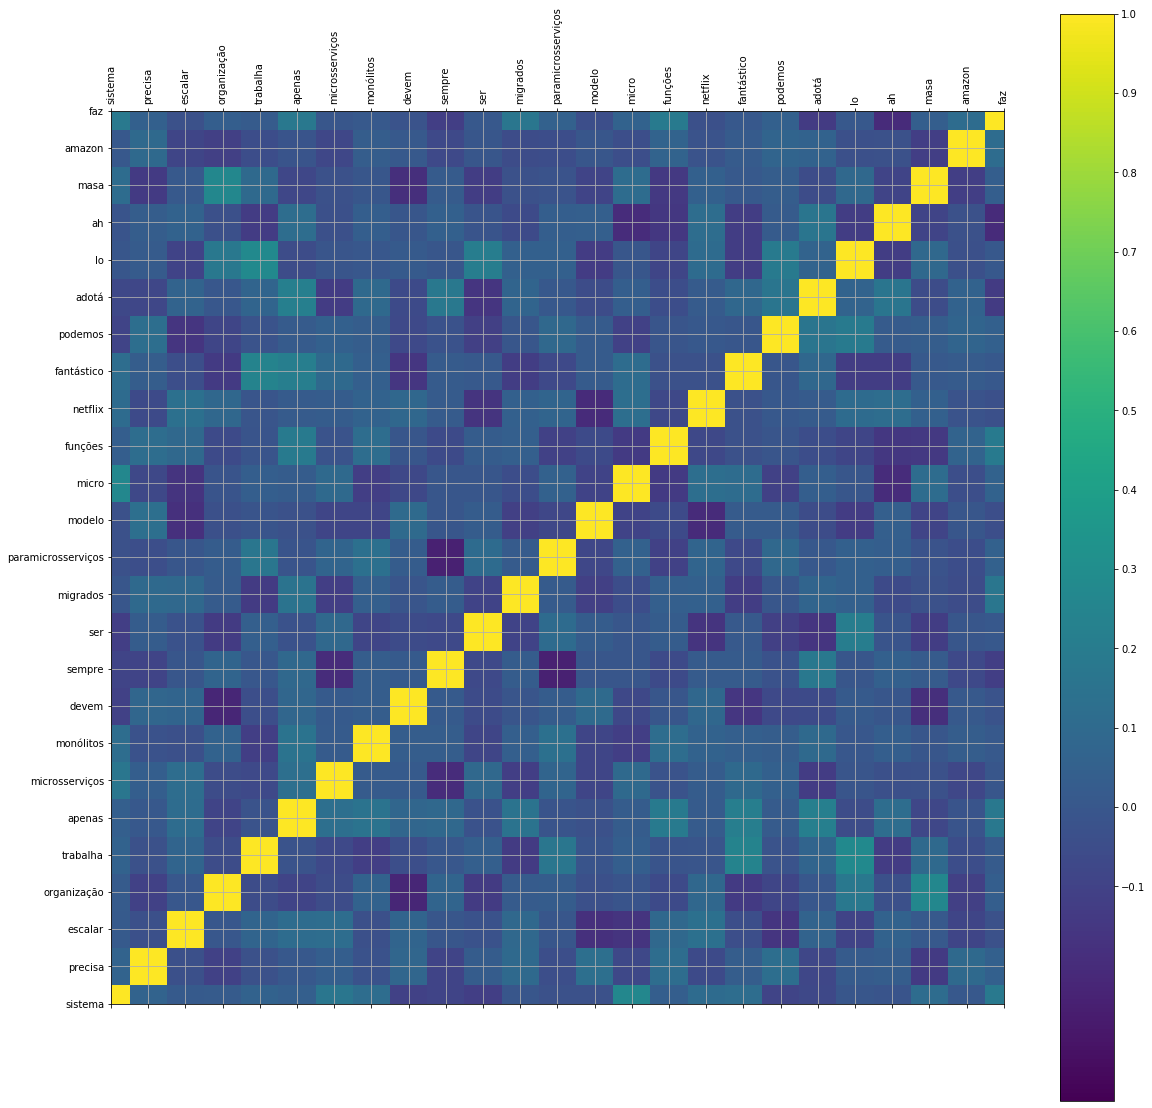

In [18]:
fig, ax = plt.subplots(figsize=(20,20))
cax = ax.matshow(similarity_array, interpolation='nearest')
ax.grid(True)
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
plt.xticks(range(25), vocab, rotation=90)
plt.yticks(range(25), vocab)
fig.colorbar(cax, ticks=[-0.1,0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, .8,.9,1])
plt.show()

In [19]:
NUM_CLUSTERS=4
kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=5000)
assigned_clusters = kclusterer.cluster(X, assign_clusters=True, trace=False)

print (assigned_clusters)
 
words = list(model.wv.vocab)

[0, 1, 3, 2, 0, 3, 2, 2, 1, 0, 3, 2, 0, 2, 0, 3, 2, 0, 2, 3, 2, 3, 0, 1, 2, 3, 2, 1, 1, 2, 3, 3, 3, 1, 1, 0, 1, 0, 0, 2, 3, 2, 3, 3, 0, 1, 1, 0, 1, 0, 0, 2, 2, 3, 1, 0, 0, 2, 0, 1, 3, 1, 3, 3, 0, 0, 0, 1, 1, 2, 0, 0, 0, 3, 2, 2, 0, 0, 0, 1, 2, 3, 0, 2, 1, 0, 0, 0, 1, 0, 3, 0, 1, 1, 2, 1, 3, 3, 3, 2, 0, 3, 0, 1, 2, 0, 0, 1, 2, 3, 3, 3, 3, 0, 1, 1, 3, 2, 3, 2, 0, 0, 1, 1, 3, 0, 3, 2, 1, 2, 2, 1, 3, 1, 2, 3, 1, 0, 2, 2, 2, 0, 3, 2, 3, 3, 2, 1, 3, 0, 2, 2, 1, 1, 1, 0, 1, 2, 1, 3, 3]


In [20]:
kmeans = cluster.KMeans(n_clusters=NUM_CLUSTERS)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [21]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [22]:
print ("Pontuação (oposto ao valor de X no objetivo K-means, que é a soma das distâncias das amostras até o centro do cluster mais próximo):")
print (kmeans.score(X))

Pontuação (oposto ao valor de X no objetivo K-means, que é a soma das distâncias das amostras até o centro do cluster mais próximo):
-0.1284826


In [23]:
silhouette_score = metrics.silhouette_score(X, labels, metric='euclidean')
 
print ("Silhouette_score: ")
print (silhouette_score)

Silhouette_score: 
0.008801124


In [24]:
y_kmeans = kmeans.fit_predict(X)

In [25]:
accuracy = round((np.mean(y_kmeans==assigned_clusters))*100)
print('Accuracy:'+str(accuracy))

Accuracy:31.0


In [26]:
X.shape, y_kmeans.shape

((161, 100), (161,))

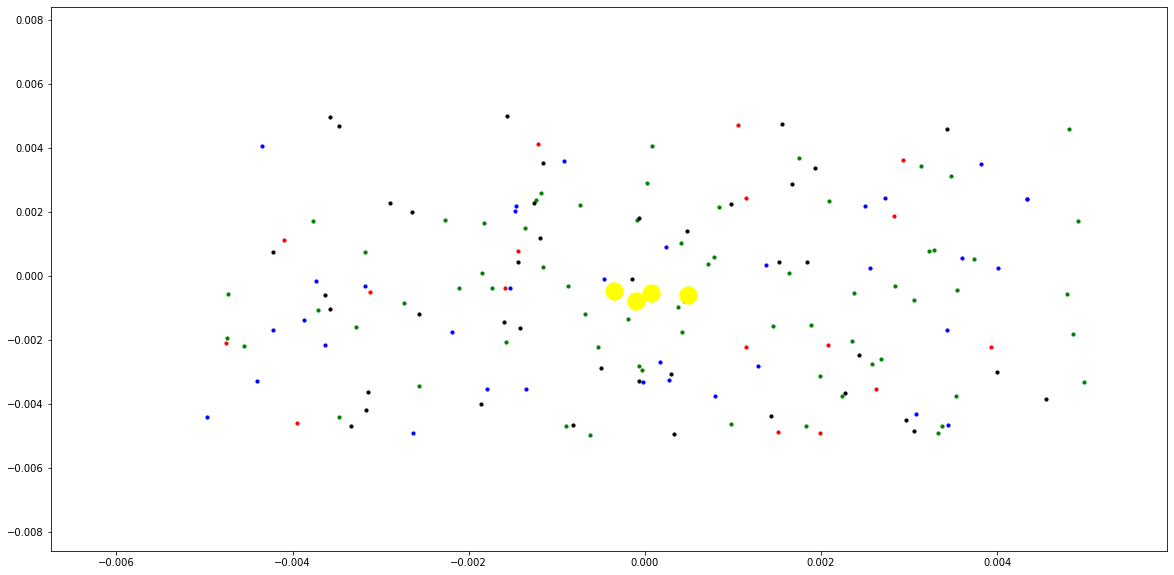

In [27]:
plt.figure(figsize=(20,10))

plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], s=10, c='red', label ='Cluster 1')
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], s=10, c='blue', label ='Cluster 2')
plt.scatter(X[y_kmeans==2, 0], X[y_kmeans==2, 1], s=10, c='green', label ='Cluster 3')
plt.scatter(X[y_kmeans==3, 0], X[y_kmeans==3, 1], s=10, c='black', label ='Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label = 'Centroids')
plt.show()

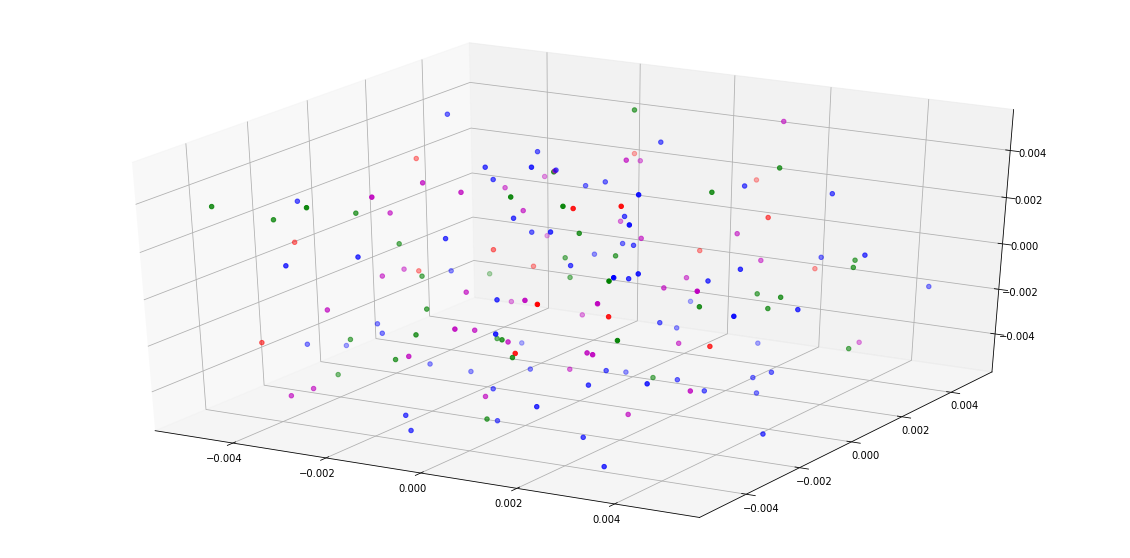

In [28]:
fig = plt.figure(figsize=(20,10))
ax = plt.axes(projection = '3d')

ax.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], X[y_kmeans==0, 2], c='r')
ax.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], X[y_kmeans==1, 2], c='g')
ax.scatter(X[y_kmeans==2, 0], X[y_kmeans==2, 1], X[y_kmeans==2, 2], c='b')
ax.scatter(X[y_kmeans==3, 0], X[y_kmeans==3, 1], X[y_kmeans==3, 2], c='m')